### CESSの結果に対して階層的クラスタリングを行う
---
#### [Method]
#### 好きな方法でクラスタリングをする

In [32]:
#Import library
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
# Set Config
CONFIG = {
    "file": "./CESS_PCAed_data_n=2.csv"
    , "detail" : [("euclidean", "ward"), ("cosine", "single")]
    , "title" : ["Euclidean Distance", "Cosine Similarity"]
}

In [34]:
#Load Data
df = pd.read_csv(CONFIG['file'], index_col=0)

In [35]:
# Define Original Function
def select(i, config):
    metric, method = config["detail"][i]
    title = config["title"][i]
    return {"metric":metric, "method":method, "title":title}

def plot_dendro(x, title):
    fig = plt.figure(figsize=(10, 10))
    dendrogram(x, labels=df.index)
    plt.title(title, size=10)
    plt.xlabel('Sample', size=10)
    plt.ylabel('Threshold', size=10)
    plt.tick_params(labelsize=8)
    return None

def whole_process(df, config):
    n_data = len(config["detail"])
    for i in range(n_data):
        select(i, config)
        arg = select(i, config)
        x = linkage(df, metric=arg["metric"], method=arg["method"])
        plot_dendro(x, arg["title"])
        plt.savefig(f"CESS_{arg['metric']}.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)
    return "Process compleated"   

'Process compleated'

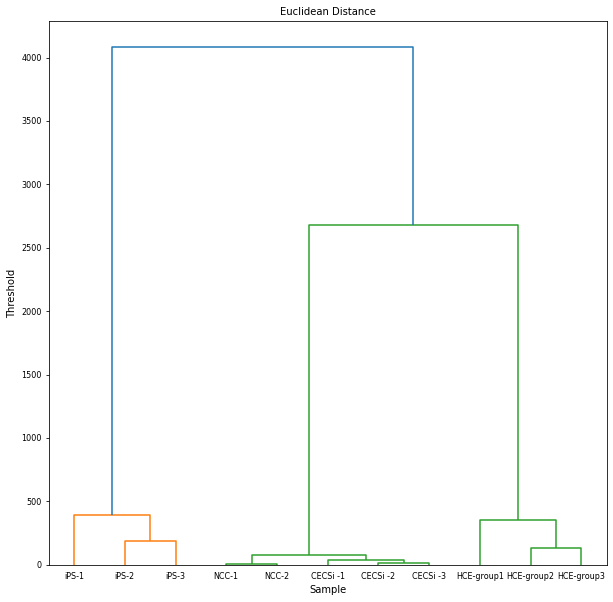

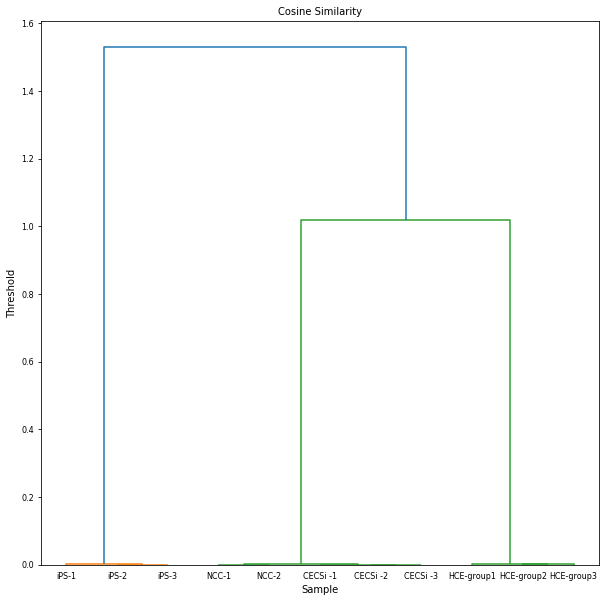

In [36]:
whole_process(df, CONFIG)